In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = '100-bird-species:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F534640%2F5468571%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240721%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240721T113324Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4608c3a706912d322a275a8b424f6556c29c71de23053cc48158d63c7918e6cc7b248ba56264c0ec37b636a55407626939b6a0584374b32d85c92780755a77f2ccc96e68ac6bef96910132e5766c2fe12d959e80b851ed493935f8ce94c4cb65cf0d31a402f46d893bcbedf9cb324212a1b0c99a4d88581c2dd5360b8e0b62c64d679f5a8952f690ad6a87b02066942ce1a7a7126669a632f2971bc82acc29c4b19ff9d78d3885dd0090fb2fdb4448c15fa2a646146106147c9986d9da45fedc0d5570f9c2a4f82f2e91256614bd5eca6d7a9f2e5fd6c0249051cc68d9ef46f8ec6ae3e881970ff9cdc92204e1161b3fba48c3608dc053deafb9667895b5e0de'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2099628449 bytes downloaded
Downloaded and uncompressed: 100-bird-species
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/100-bird-species/train/PALILA/078.jpg
/kaggle/input/100-bird-species/train/PALILA/054.jpg
/kaggle/input/100-bird-species/train/PALILA/012.jpg
/kaggle/input/100-bird-species/train/PALILA/022.jpg
/kaggle/input/100-bird-species/train/PALILA/148.jpg
/kaggle/input/100-bird-species/train/PALILA/156.jpg
/kaggle/input/100-bird-species/train/PALILA/045.jpg
/kaggle/input/100-bird-species/train/PALILA/063.jpg
/kaggle/input/100-bird-species/train/PALILA/024.jpg
/kaggle/input/100-bird-species/train/PALILA/092.jpg
/kaggle/input/100-bird-species/train/PALILA/129.jpg
/kaggle/input/100-bird-species/train/PALILA/064.jpg
/kaggle/input/100-bird-species/train/PALILA/115.jpg
/kaggle/input/100-bird-species/train/PALILA/032.jpg
/kaggle/input/100-bird-species/train/PALILA/104.jpg
/kaggle/input/100-bird-species/train/PALILA/046.jpg
/kaggle/input/100-bird-species/train/PALILA/141.jpg
/kaggle/input/100-bird-species/train/PALILA/155.jpg
/kaggle/input

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import tensorflow

In [5]:
import matplotlib.pyplot

In [6]:
traingen=ImageDataGenerator(rescale=1/255)

**creating the training data**

In [7]:
train=traingen.flow_from_directory(directory='/kaggle/input/100-bird-species/train',
                                  target_size=(224,224),
                                  batch_size=32,
                                  class_mode='categorical')

Found 84635 images belonging to 525 classes.


**creating the test data**

In [8]:
val=traingen.flow_from_directory(directory='/kaggle/input/100-bird-species/valid',
                                  target_size=(224,224),
                                  batch_size=32,
                                  class_mode='categorical')

Found 2625 images belonging to 525 classes.


**Model-1 VGG16**

In [ ]:
base_model=tensorflow.keras.applications.VGG16(include_top=False)

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
base_model.trainable=False

In [ ]:
for i in base_model.layers:
    print(i,i.trainable)

<InputLayer name=input_layer, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> False
<Conv2D name=block3_conv2, built=True> False
<Conv2D name=block3_conv3, built=True> False
<MaxPooling2D name=block3_pool, built=True> False
<Conv2D name=block4_conv1, built=True> False
<Conv2D name=block4_conv2, built=True> False
<Conv2D name=block4_conv3, built=True> False
<MaxPooling2D name=block4_pool, built=True> False
<Conv2D name=block5_conv1, built=True> False
<Conv2D name=block5_conv2, built=True> False
<Conv2D name=block5_conv3, built=True> False
<MaxPooling2D name=block5_pool, built=True> False


In [ ]:
input=tensorflow.keras.layers.Input(shape=(224,224,3))
x=base_model(input)
x=tensorflow.keras.layers.Flatten()(x)
output=tensorflow.keras.layers.Dense(525,activation='softmax')(x)

In [14]:
from tensorflow.keras.models import Model

In [ ]:
model1=Model(input,output)

In [ ]:
model1.compile(optimizer=tensorflow.keras.optimizers.Adam(),
              loss=tensorflow.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [ ]:
history=model1.fit(train,epochs=5,validation_data=val)

Epoch 1/5
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 215s 81ms/step - accuracy: 0.8381 - loss: 1.2189 - val_accuracy: 0.5771 - val_loss: 121.4258
Epoch 2/5
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 186s 70ms/step - accuracy: 0.8749 - loss: 0.9957 - val_accuracy: 0.6061 - val_loss: 258.6371
Epoch 3/5
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 189s 71ms/step - accuracy: 0.9034 - loss: 0.7607 - val_accuracy: 0.6050 - val_loss: 311.5691
Epoch 4/5
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 191s 72ms/step - accuracy: 0.9185 - loss: 0.6642 - val_accuracy: 0.6301 - val_loss: 73.1152
Epoch 5/5
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 195s 74ms/step - accuracy: 0.9311 - loss: 0.5912 - val_accuracy: 0.6381 - val_loss: 273.8609


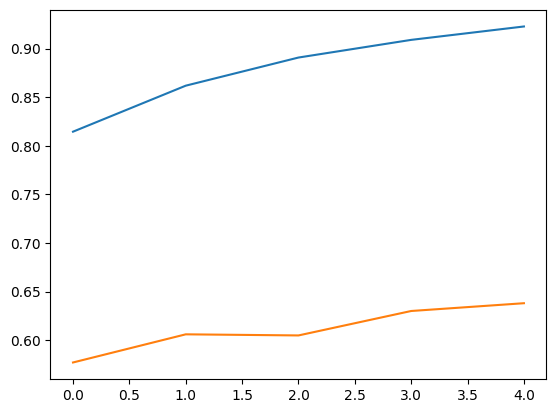

In [ ]:
fig,ax=matplotlib.pyplot.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
matplotlib.pyplot.show()

**VGG16 seems to overfit the data we will try another model**

In [ ]:
for i in base_model.layers:
    print(i,i.trainable)

<InputLayer name=input_layer_2, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> False
<Conv2D name=block3_conv2, built=True> False
<Conv2D name=block3_conv3, built=True> False
<MaxPooling2D name=block3_pool, built=True> False
<Conv2D name=block4_conv1, built=True> False
<Conv2D name=block4_conv2, built=True> False
<Conv2D name=block4_conv3, built=True> False
<MaxPooling2D name=block4_pool, built=True> False
<Conv2D name=block5_conv1, built=True> False
<Conv2D name=block5_conv2, built=True> False
<Conv2D name=block5_conv3, built=True> False
<MaxPooling2D name=block5_pool, built=True> False


In [ ]:
for i in range(13,18):
    base_model.layers[i].trainable=True

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
for i in base_model.layers:
    print(i,i.trainable)

<InputLayer name=input_layer_2, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> False
<Conv2D name=block3_conv2, built=True> False
<Conv2D name=block3_conv3, built=True> False
<MaxPooling2D name=block3_pool, built=True> False
<Conv2D name=block4_conv1, built=True> False
<Conv2D name=block4_conv2, built=True> False
<Conv2D name=block4_conv3, built=True> True
<MaxPooling2D name=block4_pool, built=True> True
<Conv2D name=block5_conv1, built=True> True
<Conv2D name=block5_conv2, built=True> True
<Conv2D name=block5_conv3, built=True> True
<MaxPooling2D name=block5_pool, built=True> False


In [ ]:
input=tensorflow.keras.layers.Input(shape=(224,224,3))
x=base_model(input)
x=tensorflow.keras.layers.Flatten()(x)
output=tensorflow.keras.layers.Dense(525,activation='sigmoid')(x)

In [ ]:
model2=Model(input,output)

In [ ]:
model2.compile(optimizer=tensorflow.keras.optimizers.Adam(),
               loss=tensorflow.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model2.fit(train,epochs=10,initial_epoch=history.epoch[-1],validation_data=val)

Epoch 5/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.0034 - loss: 6.2577

W0000 00:00:1721552948.870173     234 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2645/2645 ━━━━━━━━━━━━━━━━━━━━ 250s 94ms/step - accuracy: 0.0034 - loss: 6.2577 - val_accuracy: 0.0019 - val_loss: 343.1451
Epoch 6/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 232s 87ms/step - accuracy: 0.0031 - loss: 6.2569 - val_accuracy: 0.0019 - val_loss: 306.2083
Epoch 7/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 241s 91ms/step - accuracy: 0.0030 - loss: 6.2567 - val_accuracy: 0.0019 - val_loss: 433.3065
Epoch 8/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 262s 91ms/step - accuracy: 0.0033 - loss: 6.2562 - val_accuracy: 0.0019 - val_loss: 197.4866
Epoch 9/10
2284/2645 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.0030 - loss: 6.2566

**trying EfficientNetB0**

In [ ]:
base_model2=tensorflow.keras.applications.EfficientNetB0(include_top=False)

In [ ]:
input=tensorflow.keras.layers.Input(shape=(224,224,3)),
x=base_model2(input)
x=tensorflow.keras.layers.Flatten()(x)
output=tensorflow.keras.layers.Dense(525,activation='softmax')(x)

In [ ]:
model3=Model(input,output)

In [ ]:
model3.compile(optimizer=tensorflow.keras.optimizers.Adam(),loss=tensorflow.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history2=model3.fit(train,epochs=5,validation_data=val)

Epoch 1/5
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 618s 199ms/step - accuracy: 0.4099 - loss: 5.2880 - val_accuracy: 0.7448 - val_loss: 2.6933
Epoch 2/5
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 331s 125ms/step - accuracy: 0.7920 - loss: 2.1633 - val_accuracy: 0.7741 - val_loss: 3.3640
Epoch 3/5
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 344s 130ms/step - accuracy: 0.8636 - loss: 1.7281 - val_accuracy: 0.8156 - val_loss: 4.0452
Epoch 4/5
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 342s 129ms/step - accuracy: 0.8957 - loss: 1.5131 - val_accuracy: 0.8259 - val_loss: 4.5916
Epoch 5/5
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 335s 126ms/step - accuracy: 0.9222 - loss: 1.2666 - val_accuracy: 0.8187 - val_loss: 5.2828


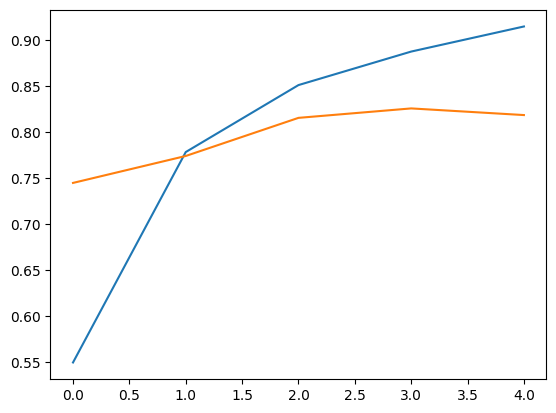

In [ ]:
fig,ax=matplotlib.pyplot.subplots()
ax.plot(history2.history['accuracy'])
ax.plot(history2.history['val_accuracy'])
matplotlib.pyplot.show()

we have fixed overfiitting and we can train model for more epochs for furthur improvement in the model
